<a href="https://colab.research.google.com/github/Harsh18999/Machine-Learning-Projects/blob/main/Loan_Approval_Prediction%20(Kaggle%20Competition)/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection**

In [ ]:
# import dependencies and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
# configration of path of kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c playground-series-s4e10

  0% 0.00/1.45M [00:00<?, ?B/s]
100% 1.45M/1.45M [00:00<00:00, 133MB/s]


In [ ]:
from zipfile import ZipFile
dataset='/content/playground-series-s4e10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Successfully File Extracted')

Successfully File Extracted


In [ ]:
# Read data
data = pd.read_csv('/content/train.csv')
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
data.shape

(58645, 13)

In [ ]:
data.dtypes

,0
id,int64
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64


In [ ]:
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [ ]:
data.drop(columns=['id'],inplace=True)


In [ ]:
# check for null values
data.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


<ipython-input-110-7ace06689b42>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,i+1)


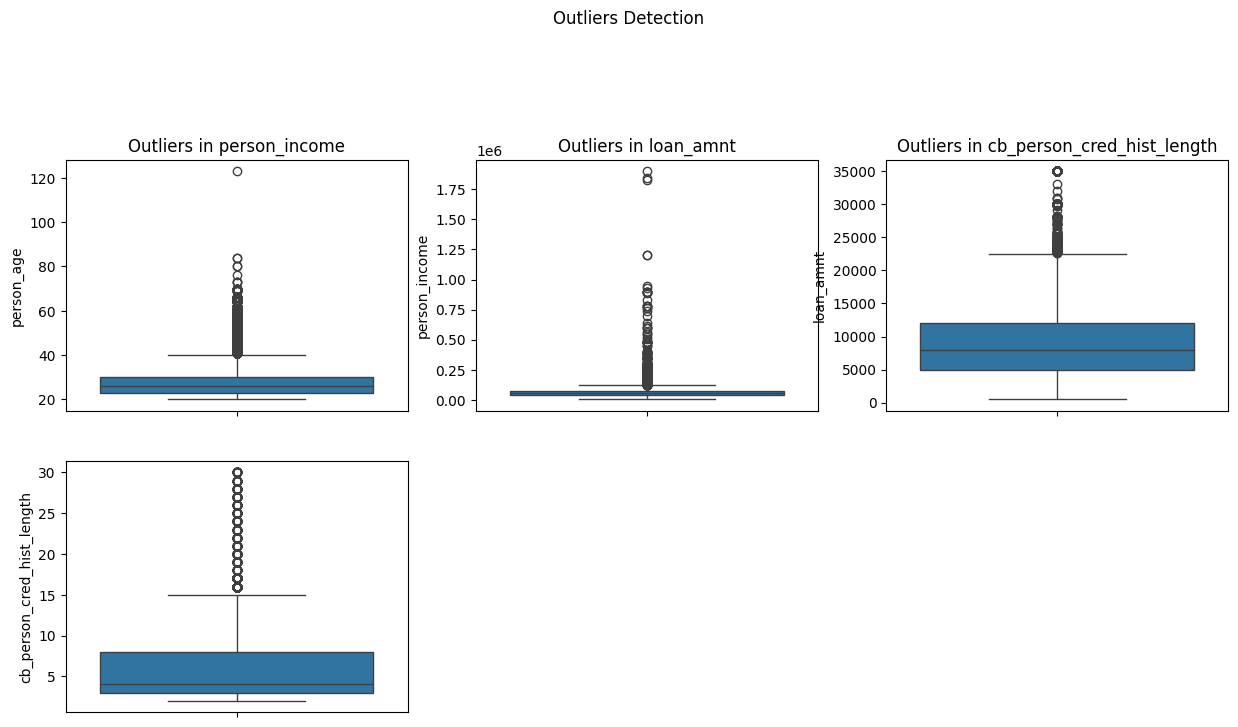

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Outliers Detection')
for i,col in enumerate(data.select_dtypes(int).columns[:-1]):
  plt.title(f'Outliers in {col}')
  plt.subplot(4,3,i+1)
  sns.boxplot(data[col])
plt.show()

In [ ]:
# Remove Outliers
for col in data.select_dtypes('int').columns[:-1]:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  data = data[ (data[col] <= (Q3 + IQR*1.5)) & (data[col] >= (Q1 - IQR*1.5))]

<ipython-input-112-2ec4d969557e>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,i+1)


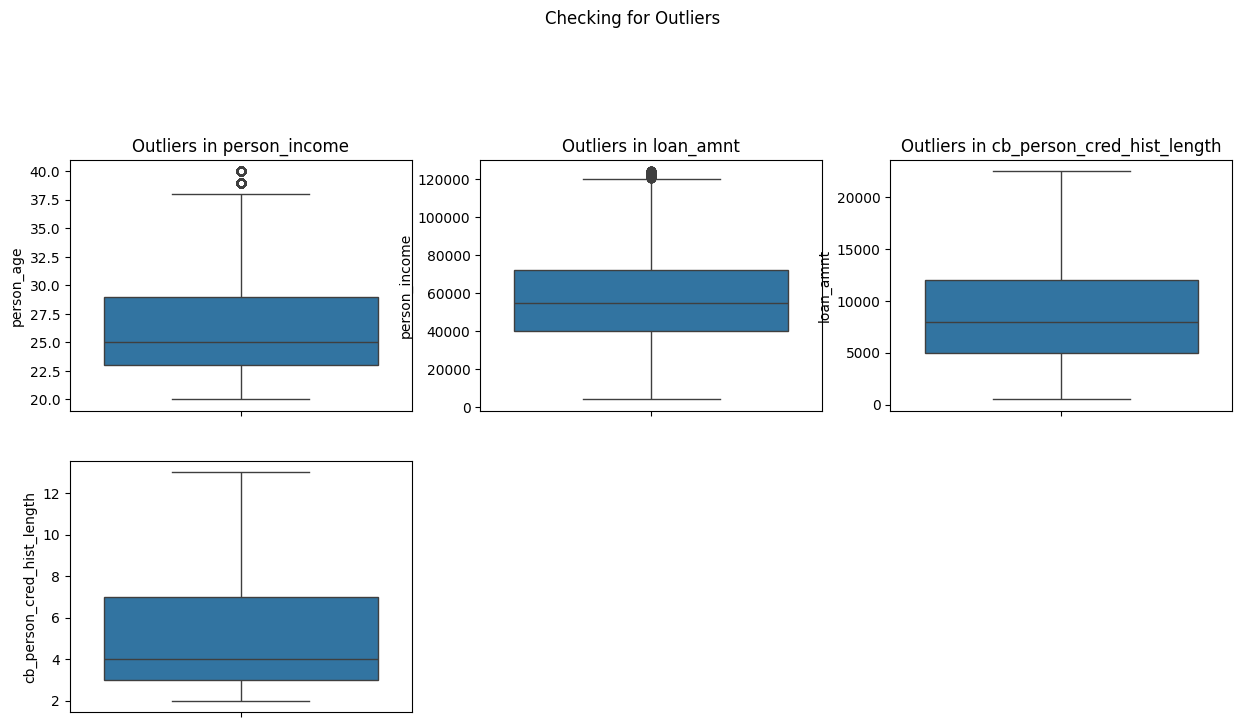

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Checking for Outliers')
for i,col in enumerate(data.select_dtypes(int).columns[:-1]):
  plt.title(f'Outliers in {col}')
  plt.subplot(4,3,i+1)
  sns.boxplot(data[col])
plt.show()

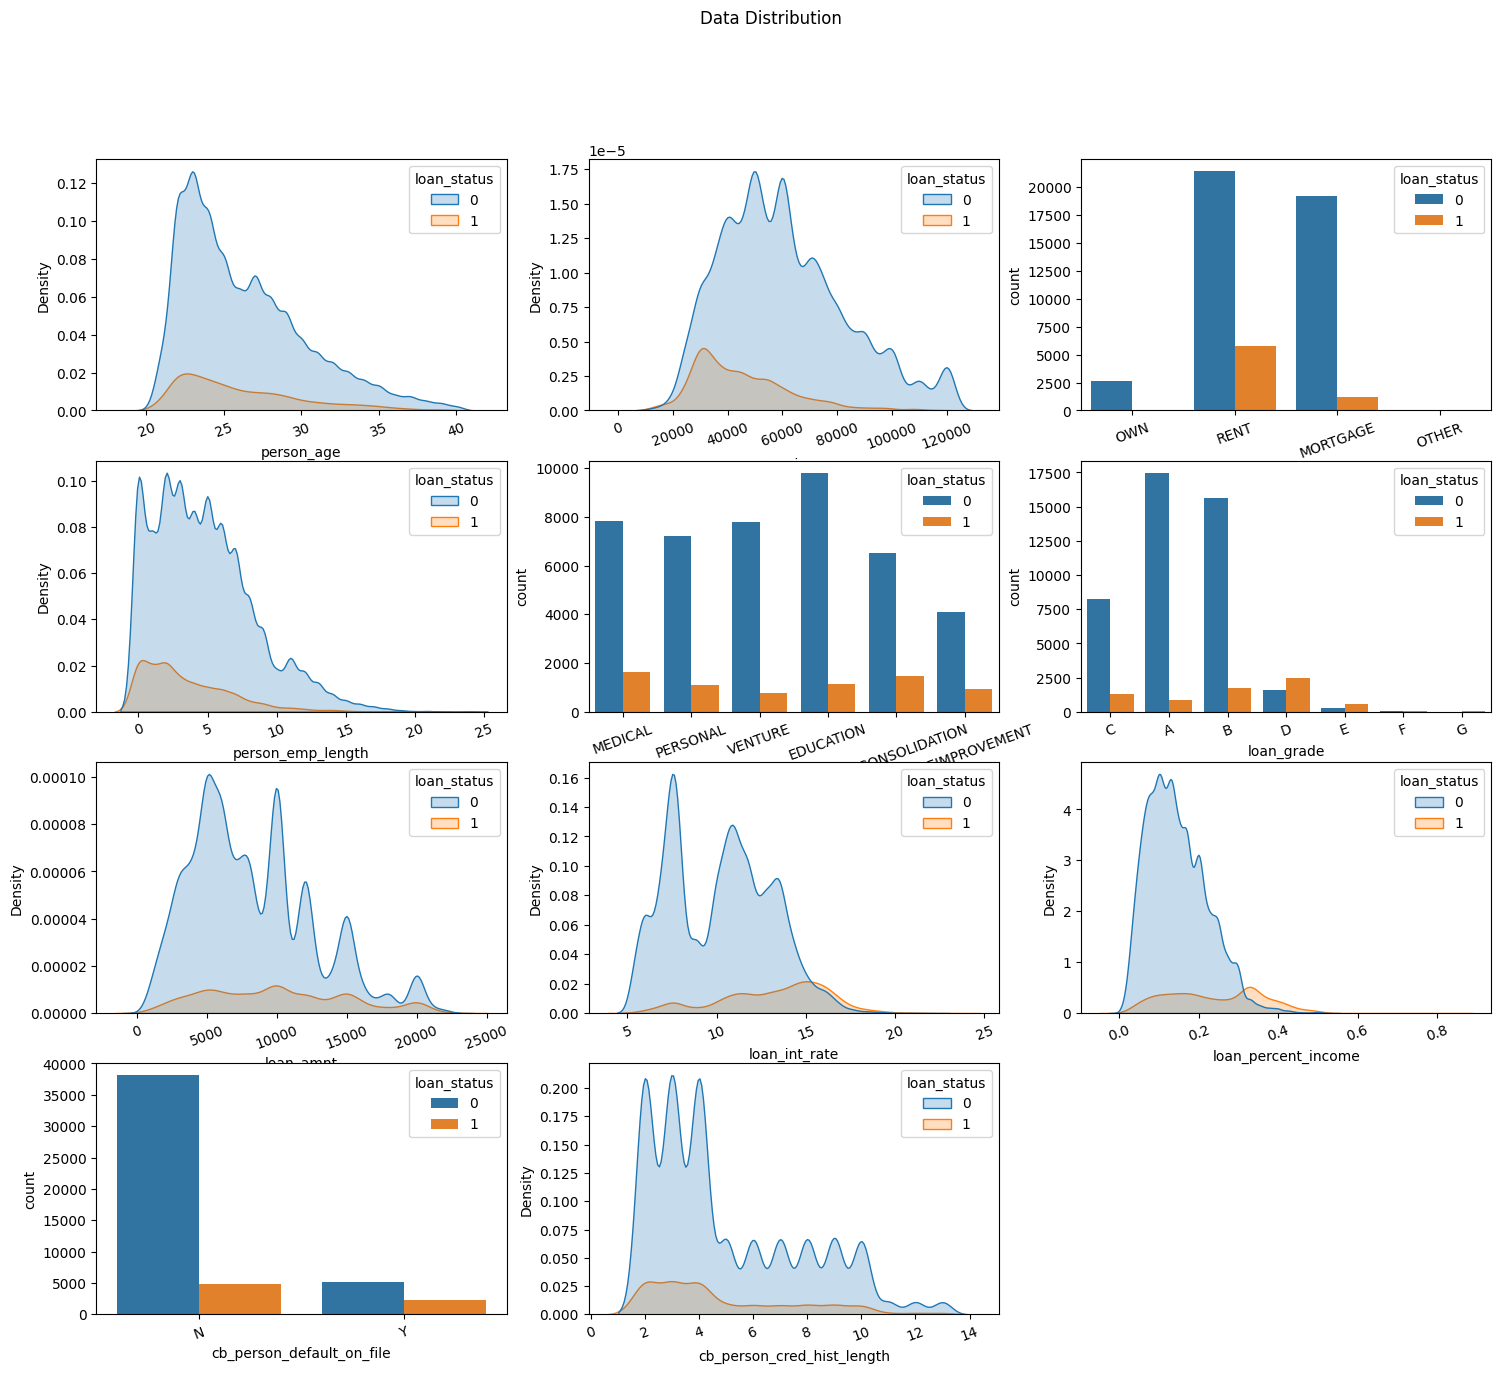

In [ ]:
# data distribution
plt.figure(figsize=(18,15))
cate_col = data.select_dtypes('object').columns
plt.suptitle('Data Distribution')
for i,col in enumerate(data.columns[:-1]):
  plt.subplot(4,3,i+1)
  if col in cate_col:
     sns.countplot(data,x=col,hue='loan_status')
  else:
    sns.kdeplot(data,x=col,hue='loan_status',fill=True)
  plt.xticks(rotation=20)
plt.show()

<Axes: >

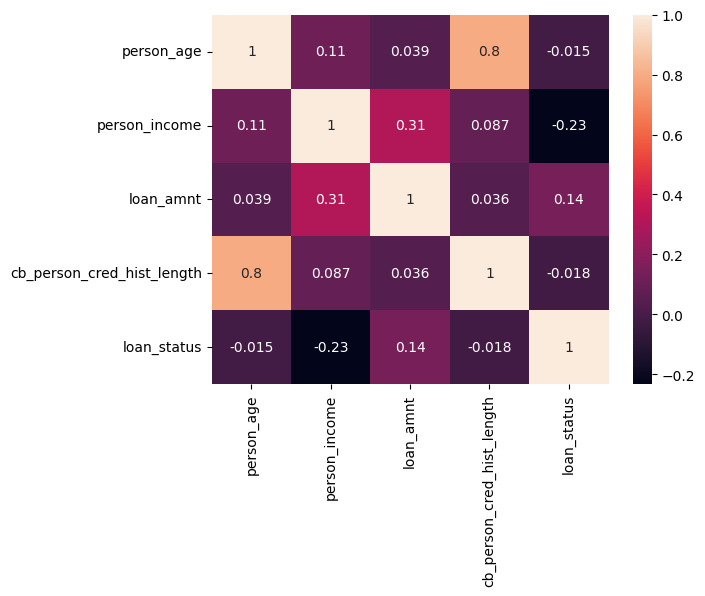

In [ ]:
# Generate a heat map
sns.heatmap(data.select_dtypes(int)[:-1].corr(),annot=True)

In [ ]:
data.loan_status.value_counts()

,count
loan_status,
0,43326
1,7056


In [ ]:
# Encode all cetrgorical features
Encoder = LabelEncoder()
for col in data.select_dtypes('object').columns:
  data[col] = Encoder.fit_transform(data[col])

In [ ]:
_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0
5,27,45000,3,2.0,5,0,9000,8.94,0.20,0,5,0


In [ ]:
X = data.drop(columns=['loan_status','cb_person_cred_hist_length']).values
y = data.loan_status.values

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
Model = DecisionTreeClassifier(max_depth=11)
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9456970466814861

In [ ]:
_data = pd.read_csv('/content/test.csv')

# Encode all cetrgorical features
Encoder = LabelEncoder()
for col in _data.select_dtypes('object').columns:
  _data[col] = Encoder.fit_transform(_data[col])

_X = _data.drop(columns=['id','cb_person_cred_hist_length']).values

In [ ]:
_y_pred = Model.predict(_X)